## Library Imports

Run this cell to import the necessary libraries

In [19]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot

import cptac
import cptac.algorithms as al

en = cptac.Endometrial()
ov = cptac.Ovarian()
co = cptac.Colon()

Checking that index is up-to-date...Loading acetylproteomics data...Loading clinical data...Loading CNA data...Loading definitions data...Loading miRNA data...Loading phosphoproteomics_gene data...Loading phosphoproteomics_site data...Loading proteomics data...Loading somatic_binary data...Loading somatic data...Loading transcriptomics_circular data...Loading transcriptomics_linear data...Formatting dataframes...Checking that index is up-to-date...Loading clinical data...Loading cnv data...Loading definitions data...Loading phosphoproteomics data...Loading proteomics data...Loading somatic_38 data...Loading transcriptomics data...Loading treatment data...Formatting dataframes...Checking that index is up-to-date...Loading clinical data...Loading miRNA data...Loading mutation_binary data...Loading mutation data...Loading phosphoproteomics_normal data...Loading phosphoproteomics_tumor data...Loading proteomics_normal data...Loading proteomics_tumor data...Loading transcriptomics data...Fo

## Get frequently mutated genes list

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [20]:
cancer_type = en
desired_cutoff = .15

fm = al.get_frequently_mutated(cancer_type, cutoff=desired_cutoff)
print(fm)

       Gene  Unique_Samples_Mut  Missence_Mut  Truncation_Mut
0     AHNAK            0.157895      0.126316        0.042105
1    ARID1A            0.452632      0.136842        0.400000
2   CCDC168            0.168421      0.115789        0.115789
3      CTCF            0.284211      0.094737        0.242105
4    CTNNB1            0.305263      0.305263        0.000000
5    DNAH17            0.157895      0.136842        0.031579
6     DOCK3            0.200000      0.115789        0.157895
7     FBXW7            0.189474      0.157895        0.042105
8     HERC2            0.178947      0.157895        0.063158
9     HUWE1            0.157895      0.157895        0.031579
10   INPPL1            0.200000      0.021053        0.189474
11     JAK1            0.168421      0.052632        0.126316
12    KMT2B            0.242105      0.115789        0.126316
13    KMT2D            0.178947      0.105263        0.084211
14     KRAS            0.326316      0.326316        0.000000
15    LM

## Select a gene from the list of frequently mutated genes above

Set the gene to which of the above frequently mutated genes you want to examine. For example, if you want to look at the gene PTEN, change the cell below to say "gene = 'PTEN'"

In [21]:
gene = 'MUC16'

## Select desired omics comparison

Select which type of omics you want to compare. If you want to compare proteomics data for the interacting proteins, uncomment the "omics = en.get_proteomics()" line, etc.

In [22]:
omics = en.get_proteomics()
#omics = en.get_transcriptomics()
#omics = en.get_phosphoproteomics()
#omics = en.get_acetylproteomics()

## Generate interacting proteins and test omics comparisons

Simply run this cell after following the instructions above to see the results of the comparisons

## Endometrial

In [27]:

'''Prevent slice degrees of freedom warning'''
import warnings
#warnings.filterwarnings("ignore")

print("\nGene: ", gene)

'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)
        
print(interacting_proteins_in_omics_df)


'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the datafram correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")


Gene:  MUC16
Generating interacting protein list
['ST6GAL1', 'ST6GALNAC2', 'C1GALT1C1', 'ST6GALNAC3', 'ST3GAL2', 'MUC16', 'MSLN', 'C1GALT1', 'MUC6', 'ST3GAL1', 'MUC5B', 'MUC1', 'MUC13', 'MUC5AC', 'LGALS1', 'IGBP1', 'RAD21', 'MCM2', 'EGFR', 'TRIM25']
OK 1
OK 2
Doing t-test comparisons

No significant comparisons.


## Ovarian

In [30]:

'''Prevent slice degrees of freedom warning'''
import warnings
#warnings.filterwarnings("ignore")

print("\nGene: ", gene)

'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)
        
print(interacting_proteins_in_omics_df)


'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = ov.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the datafram correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")


Gene:  MUC16
Generating interacting protein list
['ST6GAL1', 'ST6GALNAC2', 'C1GALT1C1', 'ST6GALNAC3', 'ST3GAL2', 'MUC16', 'MSLN', 'C1GALT1', 'MUC6', 'ST3GAL1', 'MUC5B', 'MUC1', 'MUC13', 'MUC5AC', 'LGALS1', 'IGBP1', 'RAD21', 'MCM2', 'EGFR', 'TRIM25']
ST6GALNAC2 did not match any columns in proteomics dataframe. ST6GALNAC2_proteomics column inserted, but filled with NaN.
ST6GALNAC3 did not match any columns in proteomics dataframe. ST6GALNAC3_proteomics column inserted, but filled with NaN.
ST3GAL2 did not match any columns in proteomics dataframe. ST3GAL2_proteomics column inserted, but filled with NaN.
MUC6 did not match any columns in proteomics dataframe. MUC6_proteomics column inserted, but filled with NaN.
MUC13 did not match any columns in proteomics dataframe. MUC13_proteomics column inserted, but filled with NaN.
MUC5AC did not match any columns in proteomics dataframe. MUC5AC_proteomics column inserted, but filled with NaN.


AttributeError: 'BlockManager' object has no attribute 'T'

## Colon

In [ ]:

'''Prevent slice degrees of freedom warning'''
import warnings
#warnings.filterwarnings("ignore")

print("\nGene: ", gene)

'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)
        
print(interacting_proteins_in_omics_df)


'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the datafram correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

## Look at effect on all proteins

This will look at the effect of the selected gene mutation on all proteins, and report any significant results.

## Endometrial

In [29]:
try:
    print("\nGene: ", gene)

    '''Use get interacting proteins method to generate list of interacting proteins'''
    proteomics = en.get_proteomics()
    proteins = proteomics.columns
    #proteins = proteins[:250]

    print("Generating protein list")
    interacting_proteins_in_omics_df = []

    '''Only do comparisons on proteins in the omics dataframe'''
    for ip in proteins:
        if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
            col_regex = "^{}-.*$".format(ip) # Build a regex to get all columns that match the gene
        else:
            col_regex = '^{}$'.format(ip)

        selected = omics.filter(regex=col_regex)

        if len(selected.columns) > 0:
            interacting_proteins_in_omics_df.append(ip)

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  MUC16
Generating protein list
Doing t-test comparisons

          Comparison   P_Value
0  ZNF362_proteomics  0.000003





## Ovarian

In [31]:
try:
    print("\nGene: ", gene)

    '''Use get interacting proteins method to generate list of interacting proteins'''
    proteomics = en.get_proteomics()
    proteins = proteomics.columns
    #proteins = proteins[:250]

    print("Generating protein list")
    interacting_proteins_in_omics_df = []

    '''Only do comparisons on proteins in the omics dataframe'''
    for ip in proteins:
        if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
            col_regex = "^{}-.*$".format(ip) # Build a regex to get all columns that match the gene
        else:
            col_regex = '^{}$'.format(ip)

        selected = omics.filter(regex=col_regex)

        if len(selected.columns) > 0:
            interacting_proteins_in_omics_df.append(ip)

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = ov.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  MUC16
Generating protein list
A4GALT did not match any columns in proteomics dataframe. A4GALT_proteomics column inserted, but filled with NaN.
AADAT did not match any columns in proteomics dataframe. AADAT_proteomics column inserted, but filled with NaN.
AAED1 did not match any columns in proteomics dataframe. AAED1_proteomics column inserted, but filled with NaN.
AARSD1 did not match any columns in proteomics dataframe. AARSD1_proteomics column inserted, but filled with NaN.
ABCG1 did not match any columns in proteomics dataframe. ABCG1_proteomics column inserted, but filled with NaN.
ABHD13 did not match any columns in proteomics dataframe. ABHD13_proteomics column inserted, but filled with NaN.
ABHD14A did not match any columns in proteomics dataframe. ABHD14A_proteomics column inserted, but filled with NaN.
ABHD14A-ACY1 did not match any columns in proteomics dataframe. ABHD14A-ACY1_proteomics column inserted, but filled with NaN.
ABHD2 did not match any columns in proteom

ARHGAP28 did not match any columns in proteomics dataframe. ARHGAP28_proteomics column inserted, but filled with NaN.
ARHGEF19 did not match any columns in proteomics dataframe. ARHGEF19_proteomics column inserted, but filled with NaN.
ARHGEF26 did not match any columns in proteomics dataframe. ARHGEF26_proteomics column inserted, but filled with NaN.
ARHGEF38 did not match any columns in proteomics dataframe. ARHGEF38_proteomics column inserted, but filled with NaN.
ARID3B did not match any columns in proteomics dataframe. ARID3B_proteomics column inserted, but filled with NaN.
ARL13B did not match any columns in proteomics dataframe. ARL13B_proteomics column inserted, but filled with NaN.
ARL4A did not match any columns in proteomics dataframe. ARL4A_proteomics column inserted, but filled with NaN.
ARL4D did not match any columns in proteomics dataframe. ARL4D_proteomics column inserted, but filled with NaN.
ARMC3 did not match any columns in proteomics dataframe. ARMC3_proteomics co

BHLHE40 did not match any columns in proteomics dataframe. BHLHE40_proteomics column inserted, but filled with NaN.
BICDL2 did not match any columns in proteomics dataframe. BICDL2_proteomics column inserted, but filled with NaN.
BICRAL did not match any columns in proteomics dataframe. BICRAL_proteomics column inserted, but filled with NaN.
BIRC3 did not match any columns in proteomics dataframe. BIRC3_proteomics column inserted, but filled with NaN.
BMF did not match any columns in proteomics dataframe. BMF_proteomics column inserted, but filled with NaN.
BMPR1B did not match any columns in proteomics dataframe. BMPR1B_proteomics column inserted, but filled with NaN.
BMT2 did not match any columns in proteomics dataframe. BMT2_proteomics column inserted, but filled with NaN.
BMX did not match any columns in proteomics dataframe. BMX_proteomics column inserted, but filled with NaN.
BPIFA1 did not match any columns in proteomics dataframe. BPIFA1_proteomics column inserted, but filled 

CBLC did not match any columns in proteomics dataframe. CBLC_proteomics column inserted, but filled with NaN.
CBY1 did not match any columns in proteomics dataframe. CBY1_proteomics column inserted, but filled with NaN.
CC2D2A did not match any columns in proteomics dataframe. CC2D2A_proteomics column inserted, but filled with NaN.
CCDC114 did not match any columns in proteomics dataframe. CCDC114_proteomics column inserted, but filled with NaN.
CCDC13 did not match any columns in proteomics dataframe. CCDC13_proteomics column inserted, but filled with NaN.
CCDC138 did not match any columns in proteomics dataframe. CCDC138_proteomics column inserted, but filled with NaN.
CCDC151 did not match any columns in proteomics dataframe. CCDC151_proteomics column inserted, but filled with NaN.
CCDC167 did not match any columns in proteomics dataframe. CCDC167_proteomics column inserted, but filled with NaN.
CCDC179 did not match any columns in proteomics dataframe. CCDC179_proteomics column ins

CFAP45 did not match any columns in proteomics dataframe. CFAP45_proteomics column inserted, but filled with NaN.
CFAP52 did not match any columns in proteomics dataframe. CFAP52_proteomics column inserted, but filled with NaN.
CFAP53 did not match any columns in proteomics dataframe. CFAP53_proteomics column inserted, but filled with NaN.
CFAP57 did not match any columns in proteomics dataframe. CFAP57_proteomics column inserted, but filled with NaN.
CFAP77 did not match any columns in proteomics dataframe. CFAP77_proteomics column inserted, but filled with NaN.
CGAS did not match any columns in proteomics dataframe. CGAS_proteomics column inserted, but filled with NaN.
CGRRF1 did not match any columns in proteomics dataframe. CGRRF1_proteomics column inserted, but filled with NaN.
CHFR did not match any columns in proteomics dataframe. CHFR_proteomics column inserted, but filled with NaN.
CHIC1 did not match any columns in proteomics dataframe. CHIC1_proteomics column inserted, but f

CXCL1 did not match any columns in proteomics dataframe. CXCL1_proteomics column inserted, but filled with NaN.
CXCL17 did not match any columns in proteomics dataframe. CXCL17_proteomics column inserted, but filled with NaN.
CXCL3 did not match any columns in proteomics dataframe. CXCL3_proteomics column inserted, but filled with NaN.
CXCL5 did not match any columns in proteomics dataframe. CXCL5_proteomics column inserted, but filled with NaN.
CXCL6 did not match any columns in proteomics dataframe. CXCL6_proteomics column inserted, but filled with NaN.
CXCL8 did not match any columns in proteomics dataframe. CXCL8_proteomics column inserted, but filled with NaN.
CXCL9 did not match any columns in proteomics dataframe. CXCL9_proteomics column inserted, but filled with NaN.
CXorf40A did not match any columns in proteomics dataframe. CXorf40A_proteomics column inserted, but filled with NaN.
CXorf49B did not match any columns in proteomics dataframe. CXorf49B_proteomics column inserted,

DPP6 did not match any columns in proteomics dataframe. DPP6_proteomics column inserted, but filled with NaN.
DRC1 did not match any columns in proteomics dataframe. DRC1_proteomics column inserted, but filled with NaN.
DSG4 did not match any columns in proteomics dataframe. DSG4_proteomics column inserted, but filled with NaN.
DTHD1 did not match any columns in proteomics dataframe. DTHD1_proteomics column inserted, but filled with NaN.
DTL did not match any columns in proteomics dataframe. DTL_proteomics column inserted, but filled with NaN.
DUOX1 did not match any columns in proteomics dataframe. DUOX1_proteomics column inserted, but filled with NaN.
DUSP14 did not match any columns in proteomics dataframe. DUSP14_proteomics column inserted, but filled with NaN.
DUSP16 did not match any columns in proteomics dataframe. DUSP16_proteomics column inserted, but filled with NaN.
DUSP19 did not match any columns in proteomics dataframe. DUSP19_proteomics column inserted, but filled with N

FAM3B did not match any columns in proteomics dataframe. FAM3B_proteomics column inserted, but filled with NaN.
FAM3D did not match any columns in proteomics dataframe. FAM3D_proteomics column inserted, but filled with NaN.
FAM43A did not match any columns in proteomics dataframe. FAM43A_proteomics column inserted, but filled with NaN.
FAM53B did not match any columns in proteomics dataframe. FAM53B_proteomics column inserted, but filled with NaN.
FAM53C did not match any columns in proteomics dataframe. FAM53C_proteomics column inserted, but filled with NaN.
FAM81B did not match any columns in proteomics dataframe. FAM81B_proteomics column inserted, but filled with NaN.
FAM83E did not match any columns in proteomics dataframe. FAM83E_proteomics column inserted, but filled with NaN.
FAM83F did not match any columns in proteomics dataframe. FAM83F_proteomics column inserted, but filled with NaN.
FAM83G did not match any columns in proteomics dataframe. FAM83G_proteomics column inserted,

GLOD5 did not match any columns in proteomics dataframe. GLOD5_proteomics column inserted, but filled with NaN.
GLRX2 did not match any columns in proteomics dataframe. GLRX2_proteomics column inserted, but filled with NaN.
GNA14 did not match any columns in proteomics dataframe. GNA14_proteomics column inserted, but filled with NaN.
GNA15 did not match any columns in proteomics dataframe. GNA15_proteomics column inserted, but filled with NaN.
GNGT2 did not match any columns in proteomics dataframe. GNGT2_proteomics column inserted, but filled with NaN.
GP2 did not match any columns in proteomics dataframe. GP2_proteomics column inserted, but filled with NaN.
GP6 did not match any columns in proteomics dataframe. GP6_proteomics column inserted, but filled with NaN.
GPA33 did not match any columns in proteomics dataframe. GPA33_proteomics column inserted, but filled with NaN.
GPC3 did not match any columns in proteomics dataframe. GPC3_proteomics column inserted, but filled with NaN.
GP

IFI6 did not match any columns in proteomics dataframe. IFI6_proteomics column inserted, but filled with NaN.
IFITM2 did not match any columns in proteomics dataframe. IFITM2_proteomics column inserted, but filled with NaN.
IFNAR1 did not match any columns in proteomics dataframe. IFNAR1_proteomics column inserted, but filled with NaN.
IGFBP1 did not match any columns in proteomics dataframe. IGFBP1_proteomics column inserted, but filled with NaN.
IHH did not match any columns in proteomics dataframe. IHH_proteomics column inserted, but filled with NaN.
IKZF4 did not match any columns in proteomics dataframe. IKZF4_proteomics column inserted, but filled with NaN.
IKZF5 did not match any columns in proteomics dataframe. IKZF5_proteomics column inserted, but filled with NaN.
IL10RB did not match any columns in proteomics dataframe. IL10RB_proteomics column inserted, but filled with NaN.
IL17D did not match any columns in proteomics dataframe. IL17D_proteomics column inserted, but filled 

KLHDC9 did not match any columns in proteomics dataframe. KLHDC9_proteomics column inserted, but filled with NaN.
KLHL13 did not match any columns in proteomics dataframe. KLHL13_proteomics column inserted, but filled with NaN.
KLHL24 did not match any columns in proteomics dataframe. KLHL24_proteomics column inserted, but filled with NaN.
KLHL25 did not match any columns in proteomics dataframe. KLHL25_proteomics column inserted, but filled with NaN.
KLHL3 did not match any columns in proteomics dataframe. KLHL3_proteomics column inserted, but filled with NaN.
KLHL4 did not match any columns in proteomics dataframe. KLHL4_proteomics column inserted, but filled with NaN.
KLHL5 did not match any columns in proteomics dataframe. KLHL5_proteomics column inserted, but filled with NaN.
KLHL8 did not match any columns in proteomics dataframe. KLHL8_proteomics column inserted, but filled with NaN.
KLK12 did not match any columns in proteomics dataframe. KLK12_proteomics column inserted, but f

LRP11 did not match any columns in proteomics dataframe. LRP11_proteomics column inserted, but filled with NaN.
LRP4 did not match any columns in proteomics dataframe. LRP4_proteomics column inserted, but filled with NaN.
LRRC23 did not match any columns in proteomics dataframe. LRRC23_proteomics column inserted, but filled with NaN.
LRRC46 did not match any columns in proteomics dataframe. LRRC46_proteomics column inserted, but filled with NaN.
LRRC49 did not match any columns in proteomics dataframe. LRRC49_proteomics column inserted, but filled with NaN.
LRRC4B did not match any columns in proteomics dataframe. LRRC4B_proteomics column inserted, but filled with NaN.
LRRC58 did not match any columns in proteomics dataframe. LRRC58_proteomics column inserted, but filled with NaN.
LRRC6 did not match any columns in proteomics dataframe. LRRC6_proteomics column inserted, but filled with NaN.
LSM10 did not match any columns in proteomics dataframe. LSM10_proteomics column inserted, but f

MOSPD1 did not match any columns in proteomics dataframe. MOSPD1_proteomics column inserted, but filled with NaN.
MPC1 did not match any columns in proteomics dataframe. MPC1_proteomics column inserted, but filled with NaN.
MPND did not match any columns in proteomics dataframe. MPND_proteomics column inserted, but filled with NaN.
MR1 did not match any columns in proteomics dataframe. MR1_proteomics column inserted, but filled with NaN.
MREG did not match any columns in proteomics dataframe. MREG_proteomics column inserted, but filled with NaN.
MRPL36 did not match any columns in proteomics dataframe. MRPL36_proteomics column inserted, but filled with NaN.
MRTFA did not match any columns in proteomics dataframe. MRTFA_proteomics column inserted, but filled with NaN.
MRTFB did not match any columns in proteomics dataframe. MRTFB_proteomics column inserted, but filled with NaN.
MSANTD3 did not match any columns in proteomics dataframe. MSANTD3_proteomics column inserted, but filled with

NRIP1 did not match any columns in proteomics dataframe. NRIP1_proteomics column inserted, but filled with NaN.
NTS did not match any columns in proteomics dataframe. NTS_proteomics column inserted, but filled with NaN.
NUDT11 did not match any columns in proteomics dataframe. NUDT11_proteomics column inserted, but filled with NaN.
NUDT22 did not match any columns in proteomics dataframe. NUDT22_proteomics column inserted, but filled with NaN.
NUDT7 did not match any columns in proteomics dataframe. NUDT7_proteomics column inserted, but filled with NaN.
NUFIP1 did not match any columns in proteomics dataframe. NUFIP1_proteomics column inserted, but filled with NaN.
NUPR1 did not match any columns in proteomics dataframe. NUPR1_proteomics column inserted, but filled with NaN.
NUS1 did not match any columns in proteomics dataframe. NUS1_proteomics column inserted, but filled with NaN.
ODC1 did not match any columns in proteomics dataframe. ODC1_proteomics column inserted, but filled with

PI15 did not match any columns in proteomics dataframe. PI15_proteomics column inserted, but filled with NaN.
PIGBOS1 did not match any columns in proteomics dataframe. PIGBOS1_proteomics column inserted, but filled with NaN.
PIGH did not match any columns in proteomics dataframe. PIGH_proteomics column inserted, but filled with NaN.
PIH1D2 did not match any columns in proteomics dataframe. PIH1D2_proteomics column inserted, but filled with NaN.
PIH1D3 did not match any columns in proteomics dataframe. PIH1D3_proteomics column inserted, but filled with NaN.
PILRA did not match any columns in proteomics dataframe. PILRA_proteomics column inserted, but filled with NaN.
PIMREG did not match any columns in proteomics dataframe. PIMREG_proteomics column inserted, but filled with NaN.
PIP4P1 did not match any columns in proteomics dataframe. PIP4P1_proteomics column inserted, but filled with NaN.
PIP4P2 did not match any columns in proteomics dataframe. PIP4P2_proteomics column inserted, but

PRR15L did not match any columns in proteomics dataframe. PRR15L_proteomics column inserted, but filled with NaN.
PRR16 did not match any columns in proteomics dataframe. PRR16_proteomics column inserted, but filled with NaN.
PRR5 did not match any columns in proteomics dataframe. PRR5_proteomics column inserted, but filled with NaN.
PRR5L did not match any columns in proteomics dataframe. PRR5L_proteomics column inserted, but filled with NaN.
PRR9 did not match any columns in proteomics dataframe. PRR9_proteomics column inserted, but filled with NaN.
PRSS2 did not match any columns in proteomics dataframe. PRSS2_proteomics column inserted, but filled with NaN.
PRSS22 did not match any columns in proteomics dataframe. PRSS22_proteomics column inserted, but filled with NaN.
PSCA did not match any columns in proteomics dataframe. PSCA_proteomics column inserted, but filled with NaN.
PSEN2 did not match any columns in proteomics dataframe. PSEN2_proteomics column inserted, but filled with

RNF187 did not match any columns in proteomics dataframe. RNF187_proteomics column inserted, but filled with NaN.
RNF4 did not match any columns in proteomics dataframe. RNF4_proteomics column inserted, but filled with NaN.
RNF6 did not match any columns in proteomics dataframe. RNF6_proteomics column inserted, but filled with NaN.
RNF8 did not match any columns in proteomics dataframe. RNF8_proteomics column inserted, but filled with NaN.
RNFT1 did not match any columns in proteomics dataframe. RNFT1_proteomics column inserted, but filled with NaN.
RNFT2 did not match any columns in proteomics dataframe. RNFT2_proteomics column inserted, but filled with NaN.
ROPN1L did not match any columns in proteomics dataframe. ROPN1L_proteomics column inserted, but filled with NaN.
RORB did not match any columns in proteomics dataframe. RORB_proteomics column inserted, but filled with NaN.
RPGRIP1L did not match any columns in proteomics dataframe. RPGRIP1L_proteomics column inserted, but filled 

SH2D1B did not match any columns in proteomics dataframe. SH2D1B_proteomics column inserted, but filled with NaN.
SH2D3A did not match any columns in proteomics dataframe. SH2D3A_proteomics column inserted, but filled with NaN.
SH2D3C did not match any columns in proteomics dataframe. SH2D3C_proteomics column inserted, but filled with NaN.
SH2D4B did not match any columns in proteomics dataframe. SH2D4B_proteomics column inserted, but filled with NaN.
SHB did not match any columns in proteomics dataframe. SHB_proteomics column inserted, but filled with NaN.
SHE did not match any columns in proteomics dataframe. SHE_proteomics column inserted, but filled with NaN.
SHF did not match any columns in proteomics dataframe. SHF_proteomics column inserted, but filled with NaN.
SHISA2 did not match any columns in proteomics dataframe. SHISA2_proteomics column inserted, but filled with NaN.
SHISA5 did not match any columns in proteomics dataframe. SHISA5_proteomics column inserted, but filled wi

SPDEF did not match any columns in proteomics dataframe. SPDEF_proteomics column inserted, but filled with NaN.
SPDL1 did not match any columns in proteomics dataframe. SPDL1_proteomics column inserted, but filled with NaN.
SPIN2A did not match any columns in proteomics dataframe. SPIN2A_proteomics column inserted, but filled with NaN.
SPIN3 did not match any columns in proteomics dataframe. SPIN3_proteomics column inserted, but filled with NaN.
SPINDOC did not match any columns in proteomics dataframe. SPINDOC_proteomics column inserted, but filled with NaN.
SPINK1 did not match any columns in proteomics dataframe. SPINK1_proteomics column inserted, but filled with NaN.
SPINK6 did not match any columns in proteomics dataframe. SPINK6_proteomics column inserted, but filled with NaN.
SPOP did not match any columns in proteomics dataframe. SPOP_proteomics column inserted, but filled with NaN.
SPRR2D did not match any columns in proteomics dataframe. SPRR2D_proteomics column inserted, but

TEDC2 did not match any columns in proteomics dataframe. TEDC2_proteomics column inserted, but filled with NaN.
TEF did not match any columns in proteomics dataframe. TEF_proteomics column inserted, but filled with NaN.
TEKT1 did not match any columns in proteomics dataframe. TEKT1_proteomics column inserted, but filled with NaN.
TEKT2 did not match any columns in proteomics dataframe. TEKT2_proteomics column inserted, but filled with NaN.
TEKT4 did not match any columns in proteomics dataframe. TEKT4_proteomics column inserted, but filled with NaN.
TENT2 did not match any columns in proteomics dataframe. TENT2_proteomics column inserted, but filled with NaN.
TENT4B did not match any columns in proteomics dataframe. TENT4B_proteomics column inserted, but filled with NaN.
TENT5A did not match any columns in proteomics dataframe. TENT5A_proteomics column inserted, but filled with NaN.
TENT5C did not match any columns in proteomics dataframe. TENT5C_proteomics column inserted, but filled 

TRIM8 did not match any columns in proteomics dataframe. TRIM8_proteomics column inserted, but filled with NaN.
TRIM9 did not match any columns in proteomics dataframe. TRIM9_proteomics column inserted, but filled with NaN.
TRIQK did not match any columns in proteomics dataframe. TRIQK_proteomics column inserted, but filled with NaN.
TRMT12 did not match any columns in proteomics dataframe. TRMT12_proteomics column inserted, but filled with NaN.
TRMT2B did not match any columns in proteomics dataframe. TRMT2B_proteomics column inserted, but filled with NaN.
TRPC6 did not match any columns in proteomics dataframe. TRPC6_proteomics column inserted, but filled with NaN.
TRPV4 did not match any columns in proteomics dataframe. TRPV4_proteomics column inserted, but filled with NaN.
TSHZ1 did not match any columns in proteomics dataframe. TSHZ1_proteomics column inserted, but filled with NaN.
TSHZ3 did not match any columns in proteomics dataframe. TSHZ3_proteomics column inserted, but fille

XAGE1A did not match any columns in proteomics dataframe. XAGE1A_proteomics column inserted, but filled with NaN.
XCL1 did not match any columns in proteomics dataframe. XCL1_proteomics column inserted, but filled with NaN.
XG did not match any columns in proteomics dataframe. XG_proteomics column inserted, but filled with NaN.
YAE1 did not match any columns in proteomics dataframe. YAE1_proteomics column inserted, but filled with NaN.
YJU2 did not match any columns in proteomics dataframe. YJU2_proteomics column inserted, but filled with NaN.
YPEL2 did not match any columns in proteomics dataframe. YPEL2_proteomics column inserted, but filled with NaN.
ZBED3 did not match any columns in proteomics dataframe. ZBED3_proteomics column inserted, but filled with NaN.
ZBTB12 did not match any columns in proteomics dataframe. ZBTB12_proteomics column inserted, but filled with NaN.
ZBTB3 did not match any columns in proteomics dataframe. ZBTB3_proteomics column inserted, but filled with NaN.


ZNF480 did not match any columns in proteomics dataframe. ZNF480_proteomics column inserted, but filled with NaN.
ZNF501 did not match any columns in proteomics dataframe. ZNF501_proteomics column inserted, but filled with NaN.
ZNF502 did not match any columns in proteomics dataframe. ZNF502_proteomics column inserted, but filled with NaN.
ZNF507 did not match any columns in proteomics dataframe. ZNF507_proteomics column inserted, but filled with NaN.
ZNF525 did not match any columns in proteomics dataframe. ZNF525_proteomics column inserted, but filled with NaN.
ZNF526 did not match any columns in proteomics dataframe. ZNF526_proteomics column inserted, but filled with NaN.
ZNF548 did not match any columns in proteomics dataframe. ZNF548_proteomics column inserted, but filled with NaN.
ZNF551 did not match any columns in proteomics dataframe. ZNF551_proteomics column inserted, but filled with NaN.
ZNF561 did not match any columns in proteomics dataframe. ZNF561_proteomics column inser

## Colon

In [ ]:
try:
    print("\nGene: ", gene)

    '''Use get interacting proteins method to generate list of interacting proteins'''
    proteomics = en.get_proteomics()
    proteins = proteomics.columns
    #proteins = proteins[:250]

    print("Generating protein list")
    interacting_proteins_in_omics_df = []

    '''Only do comparisons on proteins in the omics dataframe'''
    for ip in proteins:
        if omics.name == 'phosphoproteomics' or omics.name == 'acetylproteomics':
            col_regex = "^{}-.*$".format(ip) # Build a regex to get all columns that match the gene
        else:
            col_regex = '^{}$'.format(ip)

        selected = omics.filter(regex=col_regex)

        if len(selected.columns) > 0:
            interacting_proteins_in_omics_df.append(ip)

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name="proteomics", omics_genes=interacting_proteins_in_omics_df)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  MUC16
Generating protein list
A2ML1 did not match any columns in proteomics dataframe. A2ML1_proteomics column inserted, but filled with NaN.
A4GALT did not match any columns in proteomics dataframe. A4GALT_proteomics column inserted, but filled with NaN.
AADAT did not match any columns in proteomics dataframe. AADAT_proteomics column inserted, but filled with NaN.
AAED1 did not match any columns in proteomics dataframe. AAED1_proteomics column inserted, but filled with NaN.
AARSD1 did not match any columns in proteomics dataframe. AARSD1_proteomics column inserted, but filled with NaN.
ABCC10 did not match any columns in proteomics dataframe. ABCC10_proteomics column inserted, but filled with NaN.
ABCD4 did not match any columns in proteomics dataframe. ABCD4_proteomics column inserted, but filled with NaN.
ABCG1 did not match any columns in proteomics dataframe. ABCG1_proteomics column inserted, but filled with NaN.
ABHD13 did not match any columns in proteomics dataframe. AB

AGAP2 did not match any columns in proteomics dataframe. AGAP2_proteomics column inserted, but filled with NaN.
AGGF1 did not match any columns in proteomics dataframe. AGGF1_proteomics column inserted, but filled with NaN.
AGPAT4 did not match any columns in proteomics dataframe. AGPAT4_proteomics column inserted, but filled with NaN.
AGTPBP1 did not match any columns in proteomics dataframe. AGTPBP1_proteomics column inserted, but filled with NaN.
AHDC1 did not match any columns in proteomics dataframe. AHDC1_proteomics column inserted, but filled with NaN.
AJUBA did not match any columns in proteomics dataframe. AJUBA_proteomics column inserted, but filled with NaN.
AK7 did not match any columns in proteomics dataframe. AK7_proteomics column inserted, but filled with NaN.
AK8 did not match any columns in proteomics dataframe. AK8_proteomics column inserted, but filled with NaN.
AKAP11 did not match any columns in proteomics dataframe. AKAP11_proteomics column inserted, but filled wi

APBA2 did not match any columns in proteomics dataframe. APBA2_proteomics column inserted, but filled with NaN.
APBA3 did not match any columns in proteomics dataframe. APBA3_proteomics column inserted, but filled with NaN.
APC did not match any columns in proteomics dataframe. APC_proteomics column inserted, but filled with NaN.
APEX2 did not match any columns in proteomics dataframe. APEX2_proteomics column inserted, but filled with NaN.
APLF did not match any columns in proteomics dataframe. APLF_proteomics column inserted, but filled with NaN.
APOA5 did not match any columns in proteomics dataframe. APOA5_proteomics column inserted, but filled with NaN.
APOBEC3A did not match any columns in proteomics dataframe. APOBEC3A_proteomics column inserted, but filled with NaN.
APOBEC3B did not match any columns in proteomics dataframe. APOBEC3B_proteomics column inserted, but filled with NaN.
APOBEC3D did not match any columns in proteomics dataframe. APOBEC3D_proteomics column inserted, b

ATN1 did not match any columns in proteomics dataframe. ATN1_proteomics column inserted, but filled with NaN.
ATP11A did not match any columns in proteomics dataframe. ATP11A_proteomics column inserted, but filled with NaN.
ATP13A2 did not match any columns in proteomics dataframe. ATP13A2_proteomics column inserted, but filled with NaN.
ATP13A3 did not match any columns in proteomics dataframe. ATP13A3_proteomics column inserted, but filled with NaN.
ATP23 did not match any columns in proteomics dataframe. ATP23_proteomics column inserted, but filled with NaN.
ATP2C2 did not match any columns in proteomics dataframe. ATP2C2_proteomics column inserted, but filled with NaN.
ATP5F1A did not match any columns in proteomics dataframe. ATP5F1A_proteomics column inserted, but filled with NaN.
ATP5F1B did not match any columns in proteomics dataframe. ATP5F1B_proteomics column inserted, but filled with NaN.
ATP5F1C did not match any columns in proteomics dataframe. ATP5F1C_proteomics column i

BCL9 did not match any columns in proteomics dataframe. BCL9_proteomics column inserted, but filled with NaN.
BCL9L did not match any columns in proteomics dataframe. BCL9L_proteomics column inserted, but filled with NaN.
BCLAF3 did not match any columns in proteomics dataframe. BCLAF3_proteomics column inserted, but filled with NaN.
BCOR did not match any columns in proteomics dataframe. BCOR_proteomics column inserted, but filled with NaN.
BCORL1 did not match any columns in proteomics dataframe. BCORL1_proteomics column inserted, but filled with NaN.
BEND3 did not match any columns in proteomics dataframe. BEND3_proteomics column inserted, but filled with NaN.
BEND5 did not match any columns in proteomics dataframe. BEND5_proteomics column inserted, but filled with NaN.
BEND7 did not match any columns in proteomics dataframe. BEND7_proteomics column inserted, but filled with NaN.
BEX5 did not match any columns in proteomics dataframe. BEX5_proteomics column inserted, but filled with

C1orf52 did not match any columns in proteomics dataframe. C1orf52_proteomics column inserted, but filled with NaN.
C1orf53 did not match any columns in proteomics dataframe. C1orf53_proteomics column inserted, but filled with NaN.
C1orf87 did not match any columns in proteomics dataframe. C1orf87_proteomics column inserted, but filled with NaN.
C1QTNF2 did not match any columns in proteomics dataframe. C1QTNF2_proteomics column inserted, but filled with NaN.
C1QTNF6 did not match any columns in proteomics dataframe. C1QTNF6_proteomics column inserted, but filled with NaN.
C1QTNF7 did not match any columns in proteomics dataframe. C1QTNF7_proteomics column inserted, but filled with NaN.
C20orf194 did not match any columns in proteomics dataframe. C20orf194_proteomics column inserted, but filled with NaN.
C21orf2 did not match any columns in proteomics dataframe. C21orf2_proteomics column inserted, but filled with NaN.
C21orf91 did not match any columns in proteomics dataframe. C21orf91

CCDC106 did not match any columns in proteomics dataframe. CCDC106_proteomics column inserted, but filled with NaN.
CCDC114 did not match any columns in proteomics dataframe. CCDC114_proteomics column inserted, but filled with NaN.
CCDC120 did not match any columns in proteomics dataframe. CCDC120_proteomics column inserted, but filled with NaN.
CCDC13 did not match any columns in proteomics dataframe. CCDC13_proteomics column inserted, but filled with NaN.
CCDC130 did not match any columns in proteomics dataframe. CCDC130_proteomics column inserted, but filled with NaN.
CCDC138 did not match any columns in proteomics dataframe. CCDC138_proteomics column inserted, but filled with NaN.
CCDC14 did not match any columns in proteomics dataframe. CCDC14_proteomics column inserted, but filled with NaN.
CCDC149 did not match any columns in proteomics dataframe. CCDC149_proteomics column inserted, but filled with NaN.
CCDC151 did not match any columns in proteomics dataframe. CCDC151_proteomic

CDKN3 did not match any columns in proteomics dataframe. CDKN3_proteomics column inserted, but filled with NaN.
CDNF did not match any columns in proteomics dataframe. CDNF_proteomics column inserted, but filled with NaN.
CDPF1 did not match any columns in proteomics dataframe. CDPF1_proteomics column inserted, but filled with NaN.
CDR2 did not match any columns in proteomics dataframe. CDR2_proteomics column inserted, but filled with NaN.
CDR2L did not match any columns in proteomics dataframe. CDR2L_proteomics column inserted, but filled with NaN.
CDYL2 did not match any columns in proteomics dataframe. CDYL2_proteomics column inserted, but filled with NaN.
CEBPD did not match any columns in proteomics dataframe. CEBPD_proteomics column inserted, but filled with NaN.
CELSR1 did not match any columns in proteomics dataframe. CELSR1_proteomics column inserted, but filled with NaN.
CELSR2 did not match any columns in proteomics dataframe. CELSR2_proteomics column inserted, but filled wi

CHPF did not match any columns in proteomics dataframe. CHPF_proteomics column inserted, but filled with NaN.
CHRD did not match any columns in proteomics dataframe. CHRD_proteomics column inserted, but filled with NaN.
CHST10 did not match any columns in proteomics dataframe. CHST10_proteomics column inserted, but filled with NaN.
CHST11 did not match any columns in proteomics dataframe. CHST11_proteomics column inserted, but filled with NaN.
CHST12 did not match any columns in proteomics dataframe. CHST12_proteomics column inserted, but filled with NaN.
CHST3 did not match any columns in proteomics dataframe. CHST3_proteomics column inserted, but filled with NaN.
CHST4 did not match any columns in proteomics dataframe. CHST4_proteomics column inserted, but filled with NaN.
CHST6 did not match any columns in proteomics dataframe. CHST6_proteomics column inserted, but filled with NaN.
CHSY1 did not match any columns in proteomics dataframe. CHSY1_proteomics column inserted, but filled 

CRY2 did not match any columns in proteomics dataframe. CRY2_proteomics column inserted, but filled with NaN.
CRYBB1 did not match any columns in proteomics dataframe. CRYBB1_proteomics column inserted, but filled with NaN.
CRYBG1 did not match any columns in proteomics dataframe. CRYBG1_proteomics column inserted, but filled with NaN.
CRYBG2 did not match any columns in proteomics dataframe. CRYBG2_proteomics column inserted, but filled with NaN.


## Gene Set Enrichment on Significant Omics Genes

In [11]:
if len(wrap_results) > 0:
    '''Get a list of the omics genes deemed significant by wrap_ttest'''
    all_gene_list = list(wrap_results['Comparison'])
    gene_name_list = []
    for agl in all_gene_list:
        split = agl.split("_")
        gene_name_list.append(split[0])
    
    '''Use the gseapy library to run a gene set enrichment analysis on the resulting list of genes'''
    enrichment = gp.enrichr(gene_list = gene_name_list, description='ARID1A_Impacted', gene_sets='KEGG_2016', outdir='test/enrichr_kegg',cutoff=.5)
    print(enrichment.res2d)
    
else:
    print("No significant comparisons found.")

     Gene_set                                               Term Overlap  \
0   KEGG_2016  Ribosome biogenesis in eukaryotes_Homo sapiens...    6/89   
1   KEGG_2016                      Measles_Homo sapiens_hsa05162   4/136   
2   KEGG_2016                  Influenza A_Homo sapiens_hsa05164   4/175   
3   KEGG_2016                  Hepatitis C_Homo sapiens_hsa05160   3/133   
4   KEGG_2016                RNA transport_Homo sapiens_hsa03013   3/172   
5   KEGG_2016     Herpes simplex infection_Homo sapiens_hsa05168   3/185   
6   KEGG_2016   Osteoclast differentiation_Homo sapiens_hsa04380   2/132   
7   KEGG_2016        Wnt signaling pathway_Homo sapiens_hsa04310   2/142   
8   KEGG_2016                  Hepatitis B_Homo sapiens_hsa05161   2/146   
9   KEGG_2016  Signaling pathways regulating pluripotency of ...   2/142   
10  KEGG_2016               Tight junction_Homo sapiens_hsa04530   2/139   
11  KEGG_2016   Jak-STAT signaling pathway_Homo sapiens_hsa04630   2/158   
12  KEGG_201

47        0.118304                     HGD;MTHFD2;ALG2  


## Plot Gene Set Enrichment Results

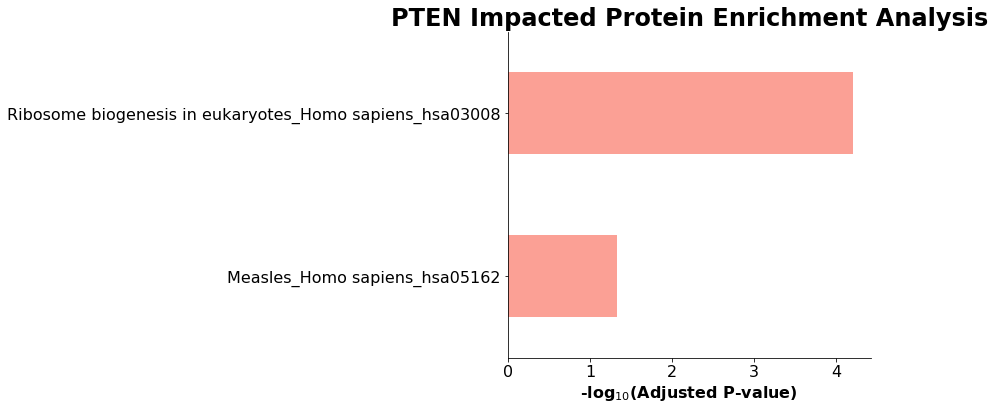

In [8]:
'''Plot the significant results of the gene set enrichment analysis'''
if len(wrap_results) > 0:
    barplot(enrichment.res2d, title=gene+ " Impacted Protein Enrichment Analysis")
else:
    print("No significant comparisons found.")